In [17]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [18]:
palette = ['#83B8FE', '#FFA54C', '#94ED67', '#FF7FFF']

In [19]:
active_col = 'Active (Dmax 0.6, pDC50 6.0)'
test_split = 0.1
n_models_for_test = 3
cv_n_folds = 5

active_name = active_col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')
report_base_name = f'{active_name}_test_split_{test_split}'

# Load the data
reports = {
    'cv_train': pd.concat([
        pd.read_csv(f'reports/cv_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/cv_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/cv_report_{report_base_name}_tanimoto.csv'),
    ]),
    'test': pd.concat([
        pd.read_csv(f'reports/test_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/test_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/test_report_{report_base_name}_tanimoto.csv'),
    ]),
    # 'ablation': pd.concat([
    #     pd.read_csv(f'reports/ablation_report_{report_base_name}_random.csv'),
    #     pd.read_csv(f'reports/ablation_report_{report_base_name}_uniprot.csv'),
    #     pd.read_csv(f'reports/ablation_report_{report_base_name}_tanimoto.csv'),
    # ]),
    'hparam': pd.concat([
        pd.read_csv(f'reports/hparam_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/hparam_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/hparam_report_{report_base_name}_tanimoto.csv'),
    ]),
    'majority_vote': pd.concat([
        pd.read_csv(f'reports/majority_vote_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/majority_vote_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/majority_vote_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_cv_train': pd.concat([
        pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_test': pd.concat([
        pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_hparam': pd.concat([
        pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_majority_vote': pd.concat([
        pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_tanimoto.csv'),
    ]),
}
for k, report in reports.items():
    print(f'{k}: {report.shape}')
    display(report.head())

cv_train: (15, 52)


,model_type,fold,train_len,val_len,train_perc,val_perc,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,val_active_perc,...,val_roc_auc,test_loss,test_acc,test_f1_score,test_precision,test_recall,test_roc_auc,split_type,train_unique_groups,val_unique_groups
0,Pytorch,0,616,155,0.798962,0.201038,0.514610,0.485390,0.376475,0.516129,...,0.904333,0.661766,0.802326,0.817204,0.716981,0.95,0.860326,random,NaN,NaN
1,Pytorch,1,617,154,0.800259,0.199741,0.513776,0.486224,0.377372,0.519481,...,0.924493,0.658051,0.755814,0.764045,0.693878,0.85,0.858152,random,NaN,NaN
2,Pytorch,2,617,154,0.800259,0.199741,0.515397,0.484603,0.376572,0.512987,...,0.931139,0.611611,0.779070,0.781609,0.723404,0.85,0.863587,random,NaN,NaN
3,Pytorch,3,617,154,0.800259,0.199741,0.515397,0.484603,0.376068,0.512987,...,0.924557,0.693243,0.732558,0.747253,0.666667,0.85,0.847826,random,NaN,NaN
4,Pytorch,4,617,154,0.800259,0.199741,0.515397,0.484603,0.377543,0.512987,...,0.927257,0.561546,0.779070,0.781609,0.723404,0.85,0.878804,random,NaN,NaN


test: (9, 34)


,train_loss,train_loss_step,train_loss_epoch,train_acc,train_acc_epoch,train_f1_score,train_f1_score_epoch,train_precision,train_precision_epoch,train_recall,...,train_avg_tanimoto_dist,test_len,test_active_perc,test_inactive_perc,test_avg_tanimoto_dist,num_leaking_uniprot_train_test,num_leaking_smiles_train_test,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test,split_type
0,0.190532,0.307893,0.190532,0.939547,0.939547,0.940150,0.940150,0.930864,0.930864,0.949622,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
1,0.188614,0.163636,0.188614,0.940806,0.940806,0.941760,0.941760,0.926829,0.926829,0.957179,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
2,0.189793,0.201865,0.189793,0.942065,0.942065,0.942786,0.942786,0.931204,0.931204,0.954660,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
0,0.543100,0.583436,0.543100,0.809463,0.809463,0.820265,0.820265,0.776256,0.776256,0.869565,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot
1,0.649270,0.631336,0.649270,0.767263,0.767263,0.795964,0.795964,0.708583,0.708583,0.907928,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot


hparam: (3, 7)


,hidden_dim,learning_rate,smote_k_neighbors,use_smote,dropout,use_batch_norm,split_type
0,128,0.000925,10,True,0.216350,True,random
0,32,0.000649,4,True,0.092638,False,uniprot
0,64,0.000771,13,False,0.304535,True,tanimoto


majority_vote: (6, 28)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1,train_len,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,test_len,...,val_active_perc,val_inactive_perc,val_avg_tanimoto_dist,num_leaking_uniprot_train_val,num_leaking_smiles_train_val,perc_leaking_uniprot_train_val,perc_leaking_smiles_train_val,cv_models,model_type,split_type
0,0.825581,0.847826,0.777778,0.875000,0.823529,771,0.514916,0.485084,0.376806,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,random
1,0.813953,0.868478,0.815789,0.775000,0.794872,617,0.515397,0.484603,0.377543,86,...,0.512987,0.487013,0.373853,40.0,70.0,0.910859,0.176661,True,Pytorch,random
0,0.611765,0.614827,0.675676,0.543478,0.602410,772,0.506477,0.493523,0.375305,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,uniprot
1,0.411765,0.549610,0.400000,0.173913,0.242424,693,0.484848,0.515152,0.377092,85,...,0.696203,0.303797,0.359625,0.0,8.0,0.000000,0.014430,True,Pytorch,uniprot
0,0.705882,0.823761,0.772727,0.459459,0.576271,772,0.518135,0.481865,0.372540,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,tanimoto


xgboost_cv_train: (15, 24)


,model_type,fold,train_len,val_len,train_perc,val_perc,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,val_active_perc,...,perc_leaking_uniprot_train_val,perc_leaking_smiles_train_val,val_acc,val_roc_auc,val_precision,val_recall,val_f1_score,split_type,train_unique_groups,val_unique_groups
0,XGBoost,0,616,155,0.798962,0.201038,0.514610,0.485390,0.376475,0.516129,...,0.886364,0.146104,0.838710,0.917167,0.816092,0.887500,0.850299,random,NaN,NaN
1,XGBoost,1,617,154,0.800259,0.199741,0.513776,0.486224,0.377372,0.519481,...,0.920583,0.188006,0.883117,0.959291,0.860465,0.925000,0.891566,random,NaN,NaN
2,XGBoost,2,617,154,0.800259,0.199741,0.515397,0.484603,0.376572,0.512987,...,0.914100,0.144246,0.876623,0.917975,0.894737,0.860759,0.877419,random,NaN,NaN
3,XGBoost,3,617,154,0.800259,0.199741,0.515397,0.484603,0.376068,0.512987,...,0.876823,0.162075,0.883117,0.937384,0.858824,0.924051,0.890244,random,NaN,NaN
4,XGBoost,4,617,154,0.800259,0.199741,0.515397,0.484603,0.377543,0.512987,...,0.910859,0.176661,0.883117,0.939241,0.858824,0.924051,0.890244,random,NaN,NaN


xgboost_test: (9, 20)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1_score,model_type,test_model_id,train_len,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,test_len,test_active_perc,test_inactive_perc,test_avg_tanimoto_dist,num_leaking_uniprot_train_test,num_leaking_smiles_train_test,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test,split_type
0,0.767442,0.879348,0.700000,0.875000,0.777778,XGBoost,0,771,0.514916,0.485084,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
1,0.790698,0.884239,0.711538,0.925000,0.804348,XGBoost,1,771,0.514916,0.485084,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
2,0.767442,0.882065,0.692308,0.900000,0.782609,XGBoost,2,771,0.514916,0.485084,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
0,0.447059,0.499443,0.482759,0.304348,0.373333,XGBoost,0,772,0.506477,0.493523,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot
1,0.517647,0.486065,0.567568,0.456522,0.506024,XGBoost,1,772,0.506477,0.493523,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot


xgboost_hparam: (3, 7)


,eta,max_depth,min_child_weight,gamma,subsample,colsample_bytree,split_type
0,0.098975,9,0.013528,0.000218,0.851506,0.630858,random
0,0.025540,3,0.051810,0.007490,0.514577,0.883731,uniprot
0,0.000391,10,0.027727,0.013472,0.649744,0.511964,tanimoto


xgboost_majority_vote: (3, 7)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1,model_type,split_type
0,0.779070,0.880978,0.723404,0.850000,0.781609,XGBoost,random
0,0.447059,0.487179,0.481481,0.282609,0.356164,XGBoost,uniprot
0,0.717647,0.831081,0.842105,0.432432,0.571429,XGBoost,tanimoto


In [20]:
cols_to_show = [
    'fold',
    'split_type',
    'train_len',
    'val_len',
    'test_len',
    'train_active_perc',
    'val_active_perc',
    'test_active_perc',
    # 'train_unique_groups',
    # 'val_unique_groups',
    'perc_leaking_uniprot_train_test',
    'perc_leaking_smiles_train_test',
    'test_avg_tanimoto_dist',
]
# print(reports['cv_train'][cols_to_show].to_markdown(index=False))
# Print a subset of columns (that contain the string "perc_") as percentages in format: .1%
tmp = reports['cv_train'][cols_to_show].copy()
for col in tmp.columns:
    if 'perc_' in col:
        tmp[col] = tmp[col].apply(lambda x: f'{x:.1%}')
    if 'dist' in col:
        tmp[col] = tmp[col].apply(lambda x: f'{x:.3f}')
print(tmp[cols_to_show].to_markdown(index=False))

|   fold | split_type   |   train_len |   val_len |   test_len |   train_active_perc |   val_active_perc |   test_active_perc | perc_leaking_uniprot_train_test   | perc_leaking_smiles_train_test   |   test_avg_tanimoto_dist |
|-------:|:-------------|------------:|----------:|-----------:|--------------------:|------------------:|-------------------:|:----------------------------------|:---------------------------------|-------------------------:|
|      0 | random       |         616 |       155 |         86 |            0.51461  |          0.516129 |           0.465116 | 82.5%                             | 11.2%                            |                    0.381 |
|      1 | random       |         617 |       154 |         86 |            0.513776 |          0.519481 |           0.465116 | 84.0%                             | 10.2%                            |                    0.381 |
|      2 | random       |         617 |       154 |         86 |            0.515397 |          

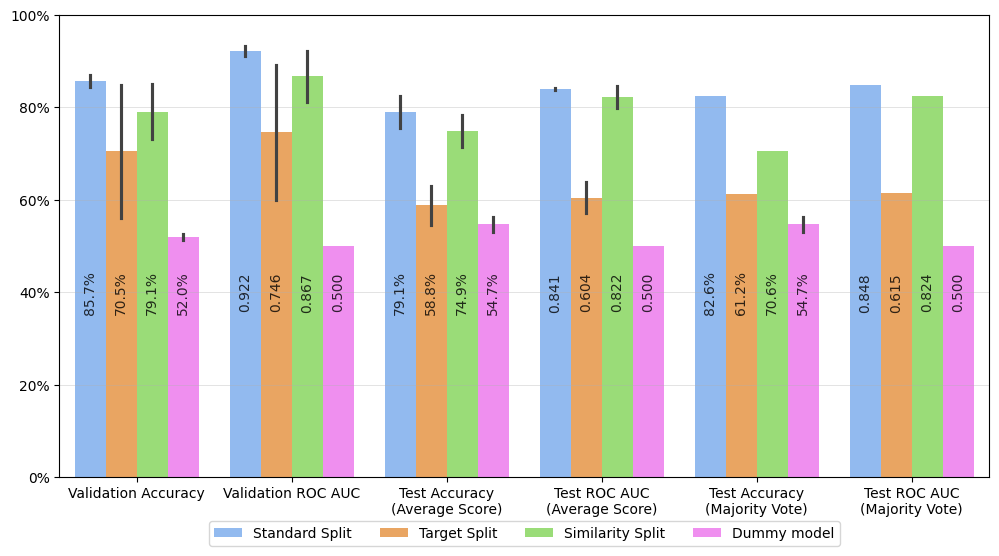

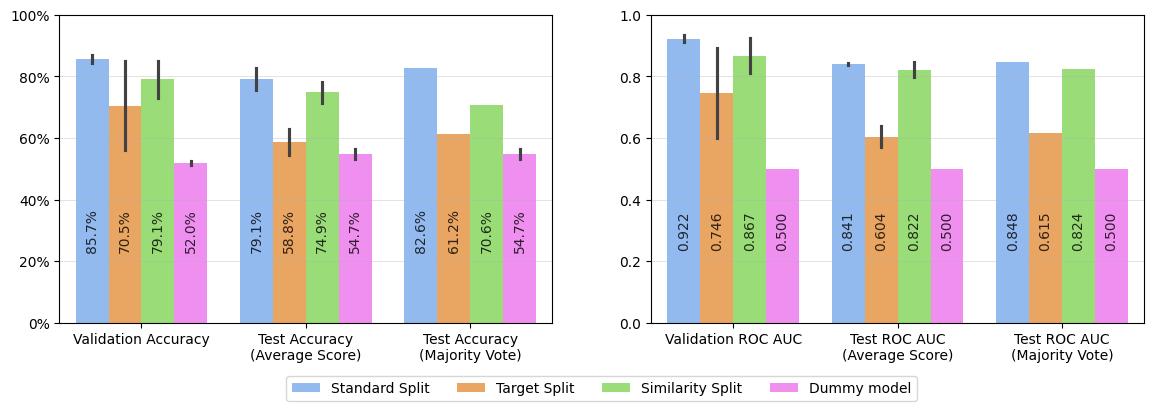

In [31]:
def plot_performance_metrics(df_cv, df_test, df_test_majority=None, title=None, show_plot=False):
    # Extract and prepare CV data
    cv_data = df_cv[['model_type', 'fold', 'split_type', 'val_acc', 'val_roc_auc']] #, 'test_acc', 'test_roc_auc']]
    cv_data = cv_data.melt(id_vars=['model_type', 'fold', 'split_type'], var_name='Metric', value_name='Score')
    cv_data['Metric'] = cv_data['Metric'].replace({
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC'
    })
    cv_data['Stage'] = cv_data['Metric'].apply(lambda x: 'Validation' if 'Val' in x else 'Test')
    # Remove test data from CV data
    cv_data = cv_data[cv_data['Stage'] == 'Validation']

    # Extract and prepare test data
    test_data = df_test[['model_type', 'test_acc', 'test_roc_auc', 'split_type']]
    test_data = test_data.melt(id_vars=['model_type', 'split_type'], var_name='Metric', value_name='Score')
    test_data['Metric'] = test_data['Metric'].replace({
        'test_acc': 'Test Accuracy\n(Average Score)',
        'test_roc_auc': 'Test ROC AUC\n(Average Score)'
    })
    test_data['Stage'] = 'Test'

    # Combine CV and test data
    combined_data = pd.concat([cv_data, test_data], ignore_index=True)

    if df_test_majority is not None:
        # Extract and prepare test data
        test_data_majority = df_test_majority[['model_type', 'test_acc', 'test_roc_auc', 'split_type']]
        test_data_majority = test_data_majority.melt(id_vars=['model_type', 'split_type'], var_name='Metric', value_name='Score')
        test_data_majority['Metric'] = test_data_majority['Metric'].replace({
            'test_acc': 'Test Accuracy\n(Majority Vote)',
            'test_roc_auc': 'Test ROC AUC\n(Majority Vote)'
        })
        test_data_majority['Stage'] = 'Test (Majority Vote)'
        combined_data = pd.concat([combined_data, test_data_majority], ignore_index=True)

    # Rename 'split_type' values according to a predefined map for clarity
    group2name = {
        'random': 'Standard Split',
        'uniprot': 'Target Split',
        'tanimoto': 'Similarity Split',
    }
    combined_data['Split Type'] = combined_data['split_type'].map(group2name)

    # Add dummy model data
    dummy_val_acc = []
    dummy_test_acc = []
    for i, group in enumerate(group2name.keys()):
        # Get the majority class in group_df
        group_df = df_cv[df_cv['split_type'] == group]
        major_col = 'inactive' if group_df['val_inactive_perc'].mean() > 0.5 else 'active'
        dummy_val_acc.append(group_df[f'val_{major_col}_perc'].mean())

        group_df = df_test[df_test['split_type'] == group]
        major_col = 'inactive' if group_df['test_inactive_perc'].mean() > 0.5 else 'active'
        dummy_test_acc.append(group_df[f'test_{major_col}_perc'].mean())

    dummy_scores = []
    for i in range(len(dummy_val_acc)):
        metrics = {
            'Validation Accuracy': dummy_val_acc[i],
            'Validation ROC AUC': 0.5,
            'Test Accuracy\n(Average Score)': dummy_test_acc[i],
            'Test ROC AUC\n(Average Score)': 0.5,
        }
        if df_test_majority is not None:
            metrics['Test Accuracy\n(Majority Vote)'] = dummy_test_acc[i]
            metrics['Test ROC AUC\n(Majority Vote)'] = 0.5
        for metric, score in metrics.items():
            dummy_scores.append({
                'Experiment': i,
                'Metric': metric,
                'Score': score,
                'Split Type': 'Dummy model',
            })
    dummy_model = pd.DataFrame(dummy_scores)
    combined_data = pd.concat([combined_data, dummy_model], ignore_index=True)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=combined_data,
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette)
    plt.title('')
    plt.ylabel('')
    plt.xlabel('')
    plt.ylim(0, 1.0)  # Assuming scores are normalized between 0 and 1
    plt.grid(axis='y', alpha=0.5, linewidth=0.5)

    # Make the y-axis as percentage
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # Plot the legend below the x-axis, outside the plot, and divided in two columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4)

    # For each bar, add the rotated value (as percentage), inside the bar
    for i, p in enumerate(plt.gca().patches):
        # TODO: For some reasons, there are 4 additional rectangles being
        # plotted... I suspect it's because the dummy_df doesn't have the same
        # shape as the df containing all the evaluation data...
        if p.get_height() < 0.01:
            continue
        if i % 2 == 0:
            value = f'{p.get_height():.1%}'
        else:
            value = f'{p.get_height():.3f}'
        
        # print(f'Plotting value: {p.get_height():.5f} -> {value}')
        x = p.get_x() + p.get_width() / 2
        y = 0.4 # p.get_height() - p.get_height() / 2
        plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    # plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    if show_plot:
        plt.show()

    # Plot in the same above the accuracy and the ROC AUC in two different subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.barplot(
        data=combined_data[combined_data['Metric'].str.contains('Accuracy')],
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette,
        ax=axes[0])
    sns.barplot(
        data=combined_data[combined_data['Metric'].str.contains('ROC AUC')],
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette,
        ax=axes[1])
    # axes[0].set_title('Accuracy')
    axes[0].set_ylabel('')
    axes[0].set_xlabel('')
    axes[0].set_ylim(0, 1.0)
    axes[0].grid(axis='y', alpha=0.5, linewidth=0.5)
    axes[0].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    axes[0].legend().remove()

    # axes[1].set_title('ROC AUC')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylim(0, 1.0)
    axes[1].grid(axis='y', alpha=0.5, linewidth=0.5)
    # axes[1].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    axes[1].legend().remove()

    # For each bar in both subplots, add the rotated value (as percentage), inside the bar
    for i, ax in enumerate(axes):
        for p in ax.patches:
            if p.get_height() < 0.01:
                continue
            if i % 2 == 0:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
            
            x = p.get_x() + p.get_width() / 2
            y = 0.3 # p.get_height() - p.get_height() / 2
            ax.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    # # For each bar, add the rotated value (as percentage), inside the bar
    # for i, p in enumerate(plt.gca().patches):
    #     # TODO: For some reasons, there are 4 additional rectangles being
    #     # plotted... I suspect it's because the dummy_df doesn't have the same
    #     # shape as the df containing all the evaluation data...
    #     if p.get_height() < 0.01:
    #         continue
    #     if i % 2 == 0:
    #         value = f'{p.get_height():.1%}'
    #     else:
    #         value = f'{p.get_height():.3f}'
        
    #     # print(f'Plotting value: {p.get_height():.5f} -> {value}')
    #     x = p.get_x() + p.get_width() / 2
    #     y = 0.4 # p.get_height() - p.get_height() / 2
    #     plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15), ncol=4)
    plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    if show_plot:
        plt.show()

plot_performance_metrics(
    df_cv=reports['cv_train'],
    df_test=reports['test'],
    df_test_majority=reports['majority_vote'][reports['majority_vote']['cv_models'].isna()],
    title=f'summary_performance-best_models_as_test',
    show_plot=True,
)

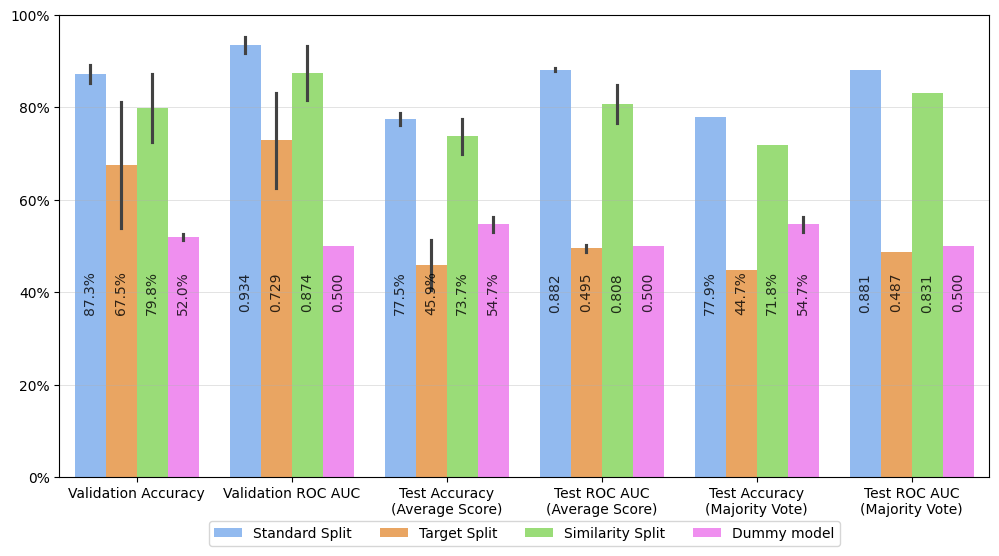

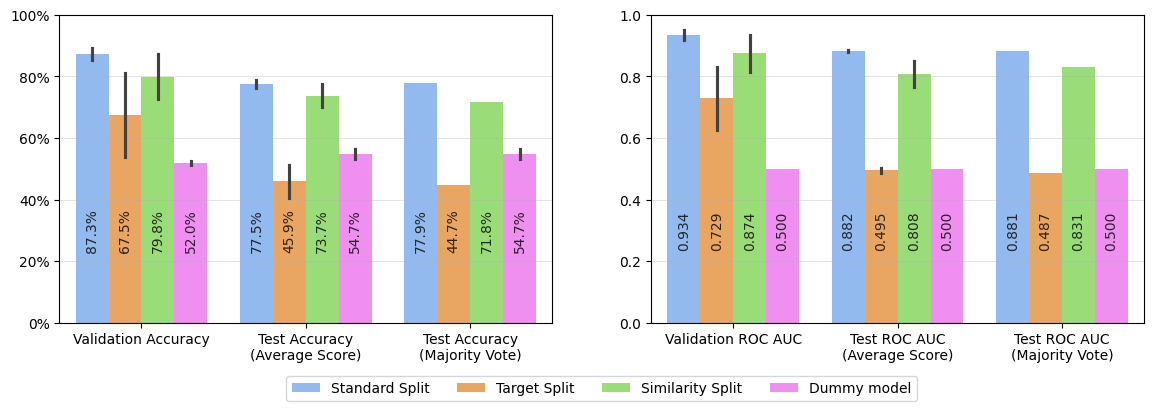

In [32]:
plot_performance_metrics(
    df_cv=reports['xgboost_cv_train'],
    df_test=reports['xgboost_test'],
    df_test_majority=reports['xgboost_majority_vote'],
    title=f'xgboost_summary_performance-best_models_as_test',
    show_plot=True,
)

Plotting value: 0.85734 -> 85.7%
Plotting value: 0.92236 -> 0.922
Plotting value: 0.82558 -> 82.6%
Plotting value: 0.84783 -> 0.848
Plotting value: 0.70521 -> 70.5%
Plotting value: 0.74610 -> 0.746
Plotting value: 0.61176 -> 61.2%
Plotting value: 0.61483 -> 0.615
Plotting value: 0.79090 -> 79.1%
Plotting value: 0.86691 -> 0.867
Plotting value: 0.70588 -> 70.6%
Plotting value: 0.82376 -> 0.824
Plotting value: 0.52003 -> 52.0%
Plotting value: 0.50000 -> 0.500
Plotting value: 0.54692 -> 54.7%
Plotting value: 0.50000 -> 0.500


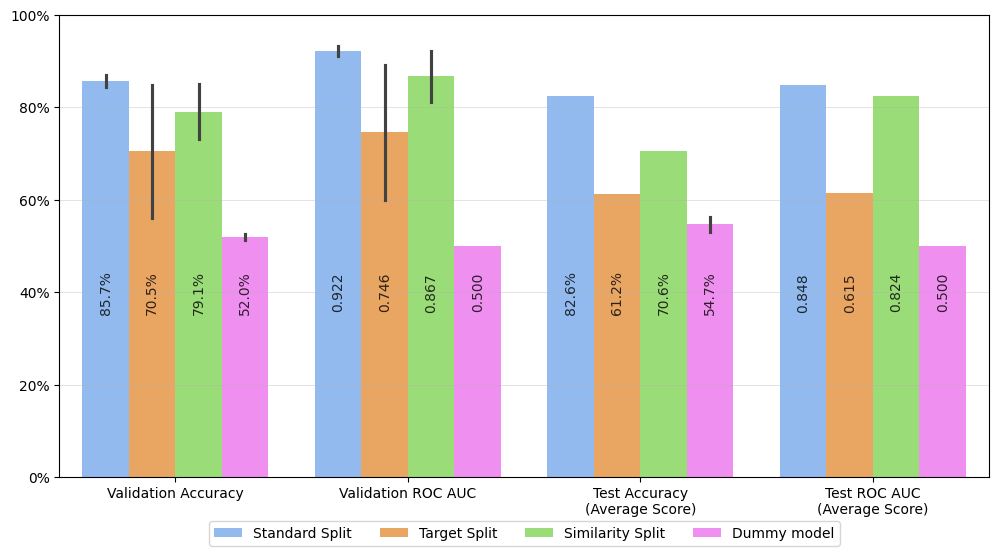

In [16]:
plot_performance_metrics(
    df_cv=reports['cv_train'],
    df_test=reports['majority_vote'][reports['majority_vote']['cv_models'].isna()],
    title=f'majority_vote_performance-best_models_as_test',
    show_plot=True,
)